# Acessing xcube via API

This script demonstrates how to access datacubes on [https://eutro-cube.cefas.co.uk/](https://eutro-cube.cefas.co.uk/) via web API

To run the script you will first need to clone the github repository [https://github.com/dcs4cop/xcube](https://github.com/dcs4cop/xcube) then activate the environment "xcube".
This code was tested on commit 2b6a463893d6e83ebf5eea87faa3609886c21f7e

In [7]:
import requests
import pandas as pd
from xcube.core.dsio import open_cube

To import an entire xcube as xarray dataset

In [4]:
flags_xcube = open_cube('https://eutro-cube.cefas.co.uk/eutro/s3bucket/flag_dur', format_name="zarr")

In [5]:
flags_xcube

<xarray.Dataset>
Dimensions:                (bnds: 2, lat: 416, lon: 416, time: 82)
Coordinates:
  * lat                    (lat) float64 65.58 65.53 65.48 ... 44.93 44.88 44.83
    lat_bnds               (lat, bnds) float64 dask.array<chunksize=(416, 2), meta=np.ndarray>
  * lon                    (lon) float64 -10.38 -10.32 -10.28 ... 10.33 10.38
    lon_bnds               (lon, bnds) float64 dask.array<chunksize=(416, 2), meta=np.ndarray>
  * time                   (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021...
    time_bnds              (time, bnds) datetime64[ns] dask.array<chunksize=(82, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    cold_flags             (time, lat, lon) float64 dask.array<chunksize=(1, 208, 208), meta=np.ndarray>
    cold_spell_dur_10days  (time, lat, lon) float64 dask.array<chunksize=(1, 208, 208), meta=np.ndarray>
    cold_spell_dur_5days   (time, lat, lon) float64 dask.array<chunksize=(1, 208, 208), meta=np.ndarray>
    warm_flags             (time, lat, lon) float64 dask.array<chunksize=(1, 208, 208), meta=np.ndarray>
    warm_spell_dur_10days  (time, lat, lon) float64 dask.array<chunksize=(1, 208, 208), meta=np.ndarray>
    warm_spell_dur_5days   (time, lat, lon) float64 dask.array<chunksize=(1, 208, 208), meta=np.ndarray>
Attributes:
    comment:                    Please visit the GitHub repository for more i...
    creator_name:               Kate Collingridge and Lenka Fronkova
    date_modified:              2021-03-25T15:36:37.352315
    description:                Products for prediction of marine heatwaves a...
    geospatial_lat_max:         65.60000000000001
    geospatial_lat_min:         44.800000000000004
    geospatial_lat_resolution:  0.05000000000000001
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         10.4
    geospatial_lon_min:         -10.4
    geospatial_lon_resolution:  0.05
    geospatial_lon_units:       degrees_east
    github_repo:                https://github.com/CefasRepRes/MHWCS_warning/...
    institution:                CEFAS
    start_time:                 20210101T000000Z
    stop_time:                  20210102T000000Z
    time_coverage_end:          2021-03-23T00:00:00.000000000
    time_coverage_start:        2021-01-01T00:00:00.000000000
    time_start:                 2021-01-01 12:00:00 UTC
    time_stop:                  2021-01-01 12:00:00 UTC
    version:                    1.0

You can inspect the list of datasets and variables using a browser:

Datasets available:
https://eutro-cube.cefas.co.uk/eutro/datasets

Vars of dataset eunosat
https://eutro-cube.cefas.co.uk/eutro/datasets/eunosat


To import data for a specific point and plot a time series

c:\users\kc05\anaconda3\envs\xcube\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eutro-cube.cefas.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<AxesSubplot:xlabel='date'>

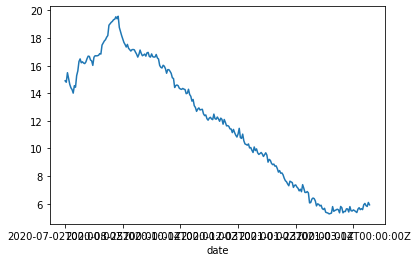

In [10]:
dataset_name="ostia"
var_name="analysed_sst_c"
lon=3.87335
lat=54.24584
#url2="https://eutro-cube.cefas.co.uk/eutro/ts/eunosat/CHL_avg/point?lon=3.87335&lat=54.24584&maxValids=-1"

url="https://eutro-cube.cefas.co.uk/eutro/ts/{dataset}/{var}/point?lon={lon}&lat={lat}&maxValids=-1".format(
        dataset=dataset_name,
        var=var_name,
        lon=lon,
        lat=lat)

resp = requests.get(url, verify=False)

df=pd.json_normalize(resp.json(),'results')
df = df.set_index('date')
df['result.average'].plot()


If you use "&maxValids=-1" you get all valid values for the point, if you omit it you will get all the points, including nan's where there is no value for a time stamp.

In [11]:
df

,result.average,result.validCount,result.totalCount
date,,,
2020-07-02T00:00:00Z,14.899994,1,1
2020-07-03T00:00:00Z,14.799988,1,1
2020-07-04T00:00:00Z,15.489990,1,1
2020-07-05T00:00:00Z,15.070007,1,1
2020-07-06T00:00:00Z,14.649994,1,1
...,...,...,...
2021-03-24T00:00:00Z,6.019989,1,1
2021-03-25T00:00:00Z,5.859985,1,1
2021-03-26T00:00:00Z,5.799988,1,1
